In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import base64
import io 
import sys
import json
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

DATA PREPROCESSING

data loading

In [2]:
INFY = pd.read_csv("D:\miniproject\public\mlmodel\INFY.csv")
AMZN = pd.read_csv("D:\miniproject\public\mlmodel\AMZN.csv")
GOOG = pd.read_csv("D:\miniproject\public\mlmodel\GOOG.csv")



INFOSYS COMPANY

In [3]:
INFY

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-05-06,5.40875,5.43500,5.37375,5.40000,4.226485,8788800
1,2013-05-07,5.40000,5.51375,5.38375,5.49375,4.299861,21380800
2,2013-05-08,5.46375,5.48750,5.40375,5.47750,4.287144,14962400
3,2013-05-09,5.44375,5.45125,5.39625,5.40875,4.233333,8533600
4,2013-05-10,5.41375,5.42500,5.32125,5.35875,4.194198,14152800
...,...,...,...,...,...,...,...
2513,2023-04-28,15.26000,15.55000,15.26000,15.54000,15.540000,11666200
2514,2023-05-01,15.50000,15.53000,15.43000,15.49000,15.490000,7691400
2515,2023-05-02,15.48000,15.57000,15.36000,15.54000,15.540000,10433300
2516,2023-05-03,15.52000,15.58000,15.35000,15.38000,15.380000,9372300


In [4]:
INFY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [5]:
INFY.dropna(inplace = True)
INFY["Date"] = pd.to_datetime(INFY["Date"])
INFY = INFY.astype({"Open": float, "Volume": float})
     

# Sort the Database by Date
INFY = INFY.sort_values(by = 'Date', ignore_index = True)
     

# Drop rows having Date < '2015-01-01'
INFY = INFY[INFY["Date"] >= '2015-01-01'].reset_index(drop = True)
     

INFY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2.099000e+03
mean,12.369657,12.474374,12.266403,12.373018,11.490927,1.024374e+07
std,5.225853,5.269359,5.184086,5.228878,5.531997,6.269908e+06
min,6.840000,6.895000,6.710000,6.795000,5.781197,1.068400e+06
25%,8.477500,8.547500,8.367500,8.465000,7.075271,6.483950e+06
50%,9.830000,9.920000,9.765000,9.860000,9.004296,8.677400e+06
75%,17.445001,17.675000,17.314999,17.490000,17.091638,1.213520e+07
max,26.150000,26.389999,25.580000,26.200001,25.631620,7.716540e+07


TESLA COMPANY

GOOGLE COMPANY

In [6]:
GOOG

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-05-06,21.127310,21.465792,21.127310,21.458319,21.458319,85973045
1,2013-05-07,21.494682,21.516102,21.187334,21.350721,21.350721,78653713
2,2013-05-08,21.344994,21.765417,21.243126,21.759192,21.759192,99102072
3,2013-05-09,21.689701,21.909378,21.624695,21.705643,21.705643,88353936
4,2013-05-10,21.801035,21.931295,21.722578,21.923574,21.923574,76192522
...,...,...,...,...,...,...,...
2513,2023-04-28,107.800003,108.290001,106.040001,108.220001,108.220001,23957900
2514,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
2515,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
2516,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300


In [7]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [8]:
# Drop NULL rows
GOOG.dropna(inplace = True)
     

# Change Dtype of Columns
GOOG["Date"] = pd.to_datetime(GOOG["Date"])

GOOG = GOOG.astype({"Open": float, "Volume": float})
     

# Sort the Database by Date
GOOG = GOOG.sort_values(by = 'Date', ignore_index = True)
     

# Drop rows having Date < '2015-01-01'
GOOG = GOOG[GOOG["Date"] >= '2015-01-01'].reset_index(drop = True)
     

GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2.099000e+03
mean,69.132541,69.875509,68.429130,69.168926,69.168926,3.269231e+07
std,34.159918,34.574943,33.758663,34.163069,34.163069,1.568121e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,6.936000e+06
25%,40.446499,40.783251,40.234001,40.566750,40.566750,2.331080e+07
50%,57.933498,58.674999,57.362999,58.118999,58.118999,2.892000e+07
75%,94.334999,95.648751,92.720001,94.297500,94.297500,3.717700e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,2.232980e+08


MICROSOFT COMPANY

AMAZON COMPANY

In [9]:
AMZN

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-05-06,12.904500,12.975000,12.671000,12.786000,12.786000,46956000
1,2013-05-07,12.815500,12.987000,12.645500,12.886500,12.886500,62674000
2,2013-05-08,12.843500,13.015000,12.766500,12.934000,12.934000,53540000
3,2013-05-09,12.936500,13.177500,12.844000,13.008000,13.008000,55386000
4,2013-05-10,13.044000,13.182500,13.010500,13.181500,13.181500,62906000
...,...,...,...,...,...,...,...
2513,2023-04-28,107.730003,109.480003,104.330002,105.449997,105.449997,130565000
2514,2023-05-01,104.949997,105.230003,101.820000,102.050003,102.050003,74728100
2515,2023-05-02,101.470001,103.900002,101.150002,103.629997,103.629997,73469400
2516,2023-05-03,103.739998,105.959999,103.279999,103.650002,103.650002,65051900


In [10]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [11]:
# Drop NULL rows
AMZN.dropna(inplace = True)
     

# Change Dtype of Columns
AMZN["Date"] = pd.to_datetime(AMZN["Date"])

AMZN = AMZN.astype({"Open": float, "Volume": float})
     

# Sort the Database by Date
AMZN = AMZN.sort_values(by = 'Date', ignore_index = True)
     

# Drop rows having Date < '2015-01-01'
AMZN = AMZN[AMZN["Date"] >= '2015-01-01'].reset_index(drop = True)
     

AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2.099000e+03
mean,88.750318,89.781644,87.606485,88.708796,88.708796,8.207021e+07
std,49.048828,49.666153,48.360336,48.992445,48.992445,4.121632e+07
min,14.314000,14.539500,14.262500,14.347500,14.347500,1.762600e+07
25%,41.814749,42.091499,41.537750,41.831751,41.831751,5.562100e+07
50%,88.339996,89.208000,87.283997,88.250000,88.250000,7.058500e+07
75%,123.099998,124.550251,121.399250,123.586251,123.586251,9.556200e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


APPLE COMPANY

b'iVBORw0KGgoAAAANSUhEUgAAB9AAAASwCAYAAACjJNG+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd3hUZfrG8Xsyk14JpELovQcQRFBQIgiKslYURbGj6Cq7oqjAWlHXwk9FERTbwqrrKroWEFCq9BAp0lsgkIQQ0vvM/P4ImWQyk0ZC6vdzXbn2nPe855w3LCLmnud5DVar1SoAAAAAAAAAAAAAAJo4l7peAAAAAAAAAAAAAAAA9QEBOgAAAAAAAAAAAAAAIkAHAAAAAAAAAAAAAEASAToAAAAAAAAAAAAAAJII0AEAAAAAAAAAAAAAkESADgAAAAAAAAAAAACAJAJ0AAAAAAAAAAAAAAAkEaADAAAAAAAAAAAAACCJAB0AAAAAAAAAAAAAAEkE6AAAAAAAAAAAAAAASCJABwAAAAAAAAAAAABAEgE6AAAAAAAAAAAAAACSCNABAAAAAAAAAAAAAJBEgA4AAAAAAAAAAAAAgCQCdAAAAAAAAAAAAAAAJBGgAwAAAAAAAAAAAAAgiQAdAAAAAAAAAAAAAABJBOgAAAAAAAAAAAAAAEgiQAcAAAAAAAAAAAAAQBIBOgAAAAAAAAAAAAAAkgjQAQAAAAAAAAAAAACQRIAOAAAAAAAAAAAAAIAkAnQAAAAAAAAAAAAAACQRoAMAAAAAAAAAAAAAIIkAHQAAAAAAAAAAAAAASQToAAAAAAAAAAAAAABIIkAHAAAAAAAAAAAAAEASAToAAAAAAAAAAAAAAJII0AEAAAAAAAAAAAAAkESADgAAAAAAAAAAAACAJAJ0AAAAAAAAAAAAAAAkEaADAAAAAAAAAAAAACCJAB0AAAAAAAAAAAAAAEkE6AAAAAAAAAAAAAAASCJABwAAAAAAAAAAAA

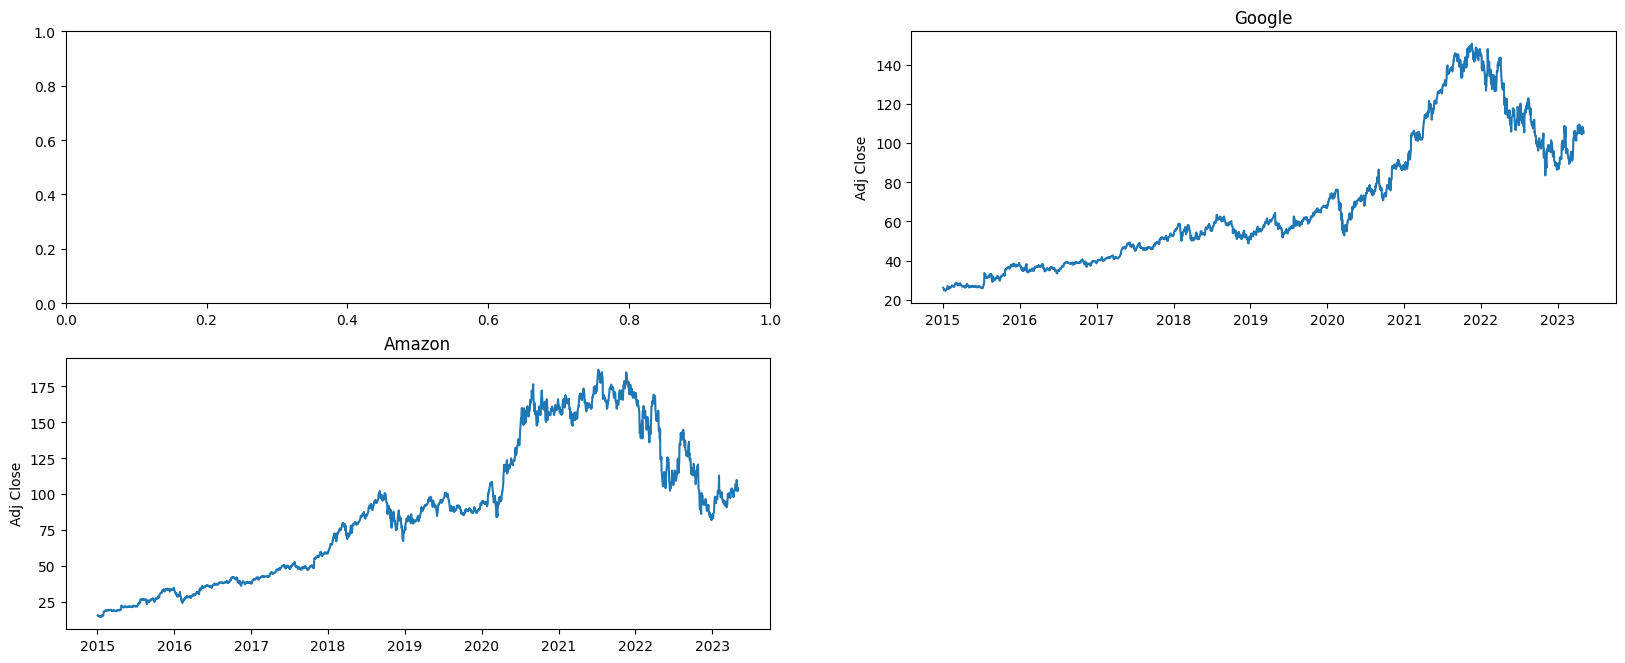

In [25]:
Companies = [INFY, GOOG, AMZN]
Companies_Title = ["Infosys","Google", "Amazon"]
Amazon=""
Google=""    

# Lets view historical view of the closing prices

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  if(index+1==1):
    continue
  else:
    plt.plot(company["Date"], company["Adj Close"])
    plt.title(Companies_Title[index])
    plt.ylabel('Adj Close')
    pic_IObytes = io.BytesIO()
    plt.savefig(pic_IObytes,  format='png')
    pic_IObytes.seek(0)
    pic_hash = base64.b64encode(pic_IObytes.read())
    if index+1 == 2:
      Google=pic_hash
    else:
      amazon=pic_hash

  

 

b'iVBORw0KGgoAAAANSUhEUgAAB9AAAASwCAYAAACjJNG+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdeZRT9f3/8VdmYdhBRQZUBK11qwpUK+KKX7G4VGttrbW2Wtran1bbKm1tse61oq1btShWRdyoWPeKIsgqMopssu87zAz7DMw+SX5/QDL33twtyZ1klufjHE5nbu69+SS5ydi8Pu/3JxSNRqMCAAAAAAAAAAAAAKCVy8n2AAAAAAAAAAAAAAAAaAoI0AEAAAAAAAAAAAAAEAE6AAAAAAAAAAAAAACSCNABAAAAAAAAAAAAAJBEgA4AAAAAAAAAAAAAgCQCdAAAAAAAAAAAAAAAJBGgAwAAAAAAAAAAAAAgiQAdAAAAAAAAAAAAAABJBOgAAAAAAAAAAAAAAEgiQAcAAAAAAAAAAAAAQBIBOgAAAAAAAAAAAAAAkgjQAQAAAAAAAAAAAACQRIAOAAAAAAAAAAAAAIAkAnQAAAAAAAAAAAAAACQRoAMAAAAAAAAAAAAAIIkAHQAAAAAAAAAAAAAASQToAAAAAAAAAAAAAABIIkAHAAAAAAAAAAAAAEASAToAAAAAAAAAAAAAAJII0AEAAAAAAAAAAAAAkESADgAAAAAAAAAAAACAJAJ0AAAAAAAAAAAAAAAkEaADAAAAAAAAAAAAACCJAB0AAAAAAAAAAAAAAEkE6AAAAAAAAAAAAAAASCJABwAAAAAAAAAAAABAEgE6AAAAAAAAAAAAAACSCNABAAAAAAAAAAAAAJBEgA4AAAAAAAAAAAAAgCQCdAAAAAAAAAAAAAAAJBGgAwAAAAAAAAAAAAAgiQAdAAAAAAAAAAAAAABJBOgAAAAAAAAAAAAAAEgiQAcAAAAAAAAAAAAAQBIBOg

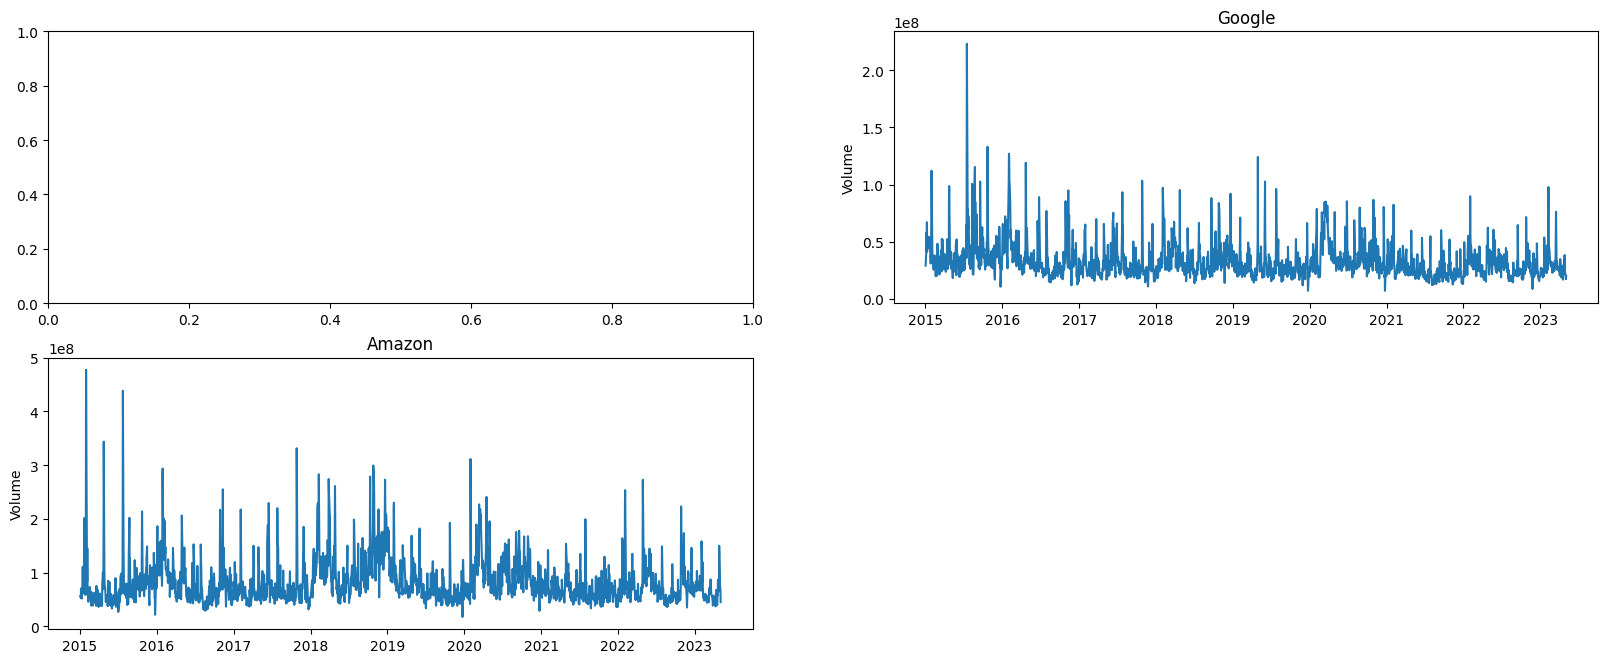

In [24]:
# Now lets plot the total volume of stock being traded each day 

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  if(index+1==1):
    continue
  else:
    plt.plot(company["Date"], company["Volume"])
    plt.title(Companies_Title[index])
    plt.ylabel('Volume')
    pic_IObytes = io.BytesIO()
    plt.savefig(pic_IObytes,  format='png')
    pic_IObytes.seek(0)
    pic_hash1 = base64.b64encode(pic_IObytes.read())
    if index+1 == 2:
      Google1=pic_hash1
    else:
      Amazon1=pic_hash1
  
 

 

b'iVBORw0KGgoAAAANSUhEUgAAB9AAAASwCAYAAACjJNG+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd3hUVf7H8fdMekICUgMaekek2RBEXFFAFEFcQWNBUdEVu4Kudde6FiysgoW2/mCxgbIKutjoClKC9CJNkCIthJCQZOb3R3Q0SxEUCOL79TzzOHPvued+7yWYhM895wTC4XAYSZIkSZIkSZIkSZL+4ILFXYAkSZIkSZIkSZIkSUcCA3RJkiRJkiRJkiRJkjBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJkiRJkiQJMECXJEmSJEmSJEmSJAkwQJckSZIkSZIkSZIkCTBAlyRJkiRJki

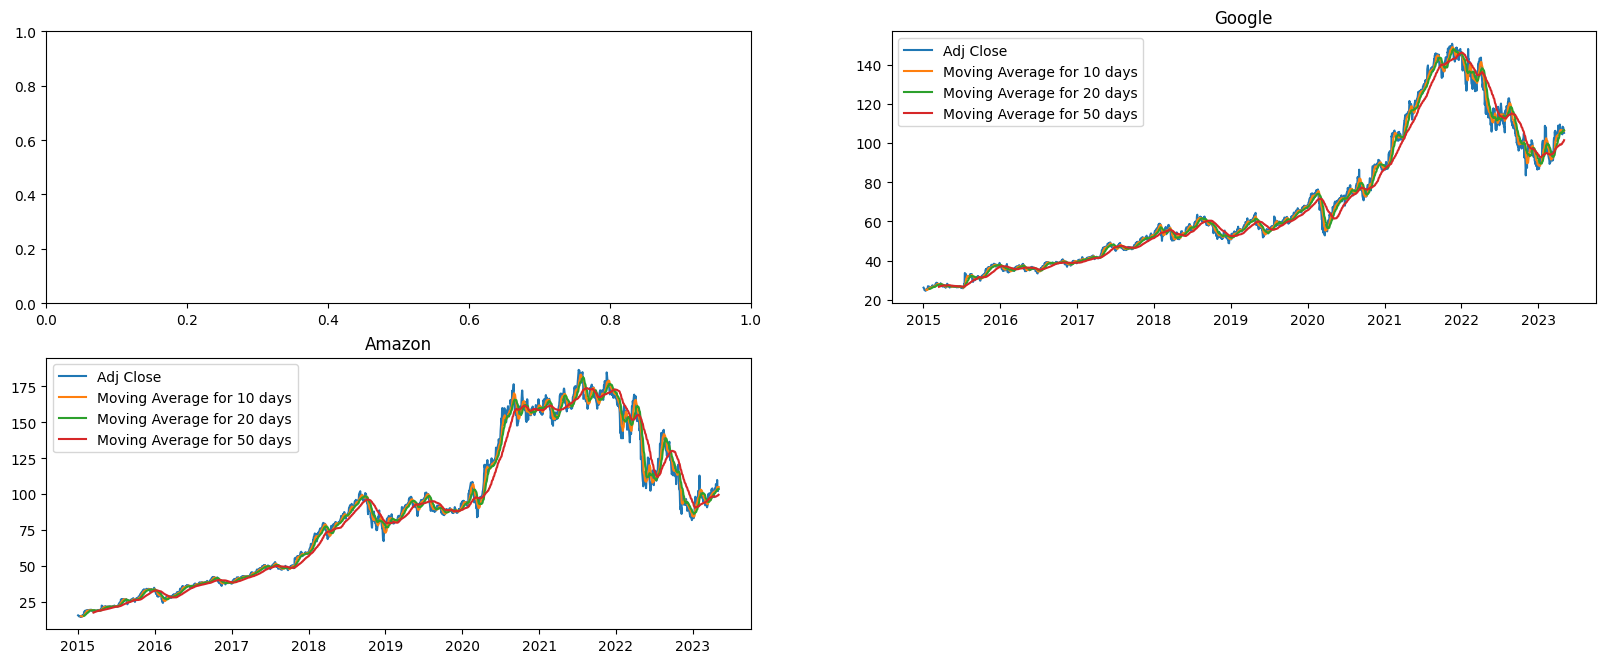

In [23]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
  for company in Companies:
    
    column_name = f'Moving Average for {Moving_Average} days'
    company[column_name] = company["Adj Close"].rolling(Moving_Average).mean()
     

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  
  if(index+1==1):
    continue
  else:
    plt.plot(company["Date"], company["Adj Close"])
    plt.plot(company["Date"], company["Moving Average for 10 days"])
    plt.plot(company["Date"], company["Moving Average for 20 days"])
    plt.plot(company["Date"], company["Moving Average for 50 days"])
    plt.title(Companies_Title[index])
    plt.legend(("Adj Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))
    pic_IObytes = io.BytesIO()
    plt.savefig(pic_IObytes,  format='png')
    pic_IObytes.seek(0)
    pic_hash1 = base64.b64encode(pic_IObytes.read())
    if index+1 == 2:
      Google2=pic_hash1
    else:
      Amazon2=pic_hash1

     

b'iVBORw0KGgoAAAANSUhEUgAAB9AAAASwCAYAAACjJNG+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAABHV0lEQVR4nOzdcazddX34/2db7C1GWnEdt8CqHThEBQFBuoLEsFSbSND+Me3QACGgU9EIjRMQpSKTMr9KSEaViDj9h4EaMUZIHVaJcXQhAk00AwwiQowtMEfLirbQnt8fi92vUioH7DmFPh7J+eN++Hy475O8c/t5nec9504ZDAaDAAAAAAAAAGAPN3XcCwAAAAAAAACA3YGADgAAAAAAAAAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCegAAAAAAAAAUAnoAAAAAAAAAFAJ6AAAAAAAAABQCe

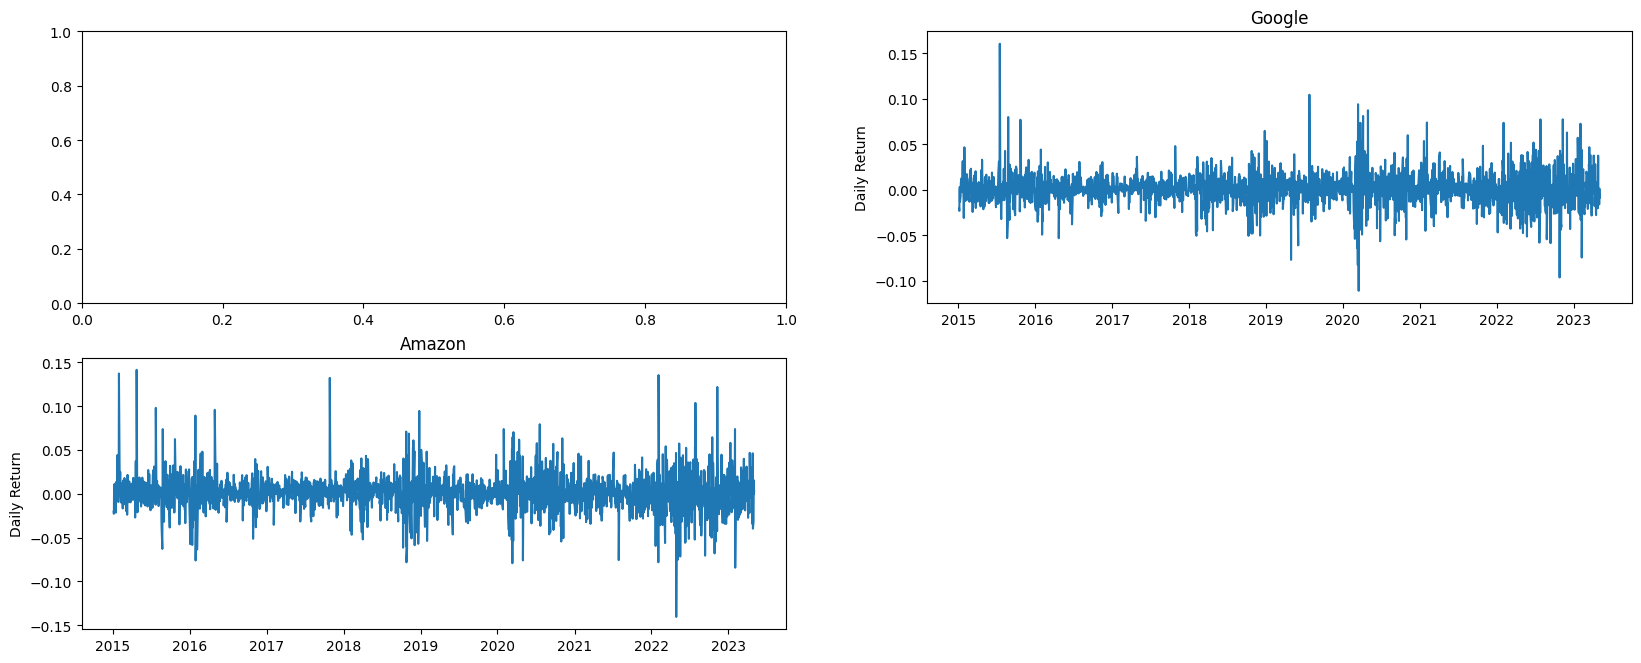

In [26]:
# pct_change() function calculates the percentage change between the current and a prior element.
# This function by default calculates the percentage change from the immediately previous row. 

for company in Companies:
   company["Daily Return"] = company["Adj Close"].pct_change()
     

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  if(index+1==1):
    continue
  else:
    pic_IObytes = io.BytesIO()
    plt.savefig(pic_IObytes,  format='png')
    pic_IObytes.seek(0)
    pic_hash1 = base64.b64encode(pic_IObytes.read())
    if index+1 == 2:
      Google3=pic_hash1
    else:
      Amazon3=pic_hash1
  plt.plot(company["Date"], company["Daily Return"])
  plt.title(Companies_Title[index])
  plt.ylabel('Daily Return')




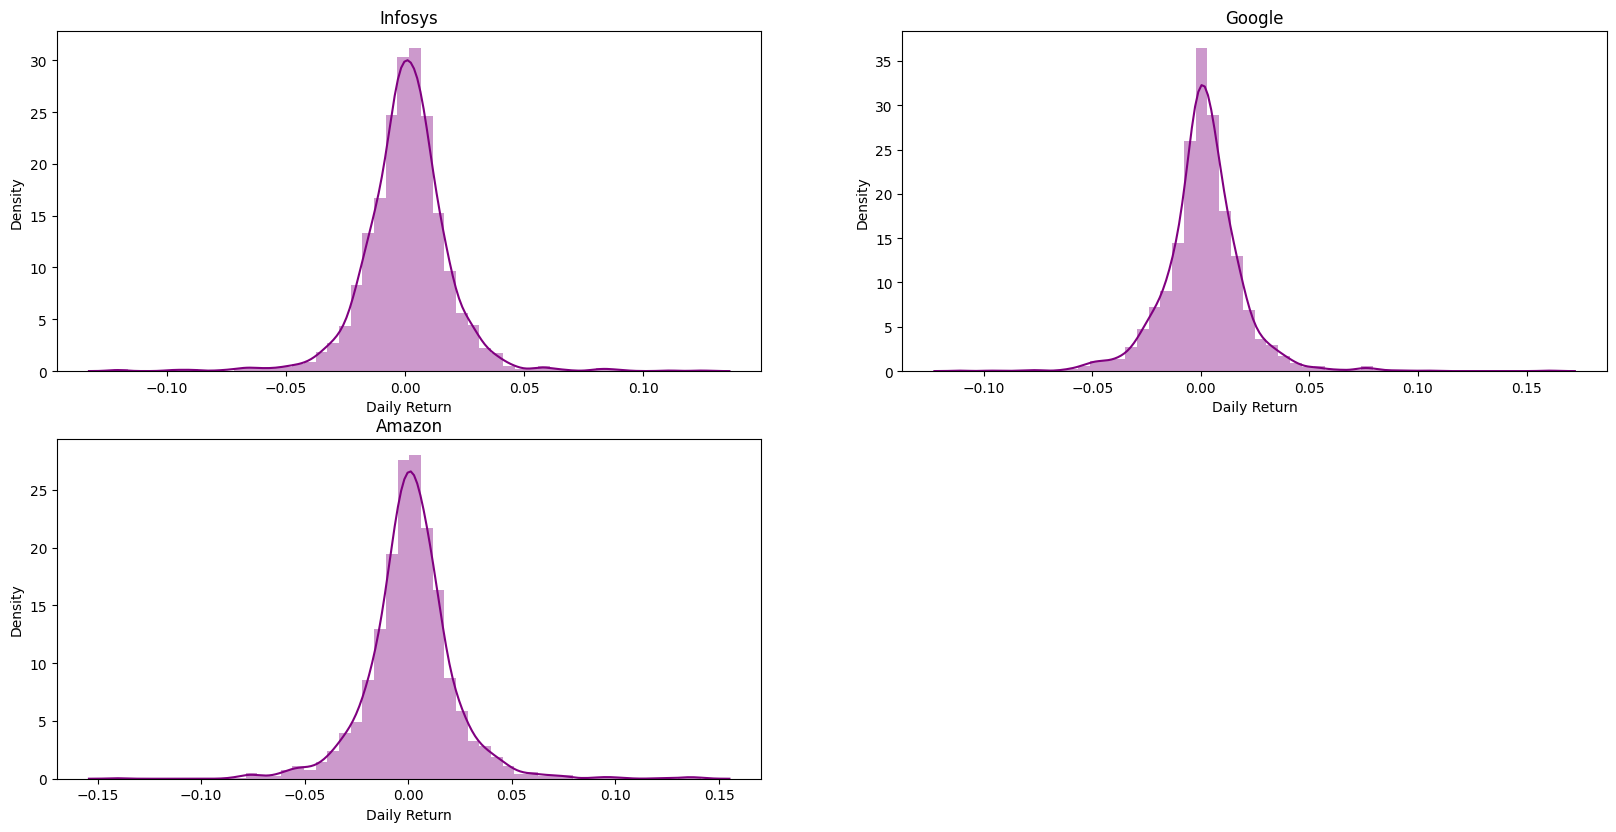

In [18]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 15))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  sns.distplot(company["Daily Return"].dropna(), color = "purple")
  plt.title(Companies_Title[index])

In [32]:
def Dataset(Data, Date):

  Train_Data = Data['Adj Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

MODEL

In [33]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [34]:
model = Model()

In [35]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 548,005
Trainable params: 548,005
Non-trai

LEARNING RATE

In [37]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

b'iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAA91ElEQVR4nO3de3xU9Z3/8fdMQiYJkAQIJATCVbkJCTehEazapkbK0trbj1IqlLW2WtyqbK2iFda1Cm2V2laUSkttd6uoXXXbSrFsFCk1glwiiXJVMOGShFsyCSHXOb8/kjMkECCXmTkz57yej8c8HuXkTPKZw6Pk7ff7/Xy/LsMwDAEAAMAx3FYXAAAAgNAiAAIAADgMARAAAMBhCIAAAAAOQwAEAABwGAIgAACAwxAAAQAAHIYACAAA4DAEQAAAAIchAAIAADgMARAAAMBhCIAAAAAOQwAEAABwGAIgAACAwxAAAQAAHIYACAAA4DAEQAAAAIchAAIAADgMARAAAMBhCIAAAAAOQwAEAABwGAIgAACAwxAAAQAAHIYACAAA4DAEQAAAAIchAAIAADgMARAAAMBhCIAAAAAOQwAEAABwGAIgAACAwxAAAQAAHIYACAAA4DAEQAAAAIchAAIAADgMARAAAMBhCIAAAAAOQwAEAABwGAIgAACAwxAAAQAAHIYACAAA4DAEQAAAAIchAAIAADgMATBANm3apFmzZiktLU0ul0uvvfZaUH/ef/zHf8jlcrV6jRo1Kqg/EwAA2AMBMEDOnDmjzMxMrVy5MmQ/86qrrtKxY8f8r82bN4fsZwMAgMgVbXUBdjFjxgzNmDHjol+vra3Vgw8+qBdeeEHl5eUaO3asfvKTn+j666/v9M+Mjo5Wampqp98PAACciRHAELnzzjuVl5entWvXateuXfra176mm266Sfv37+/099y/f7/S0tI0bNgwzZ07V0VFRQGsGAAA2JXLMAzD6iLsxuVy6dVXX9XNN98sSS

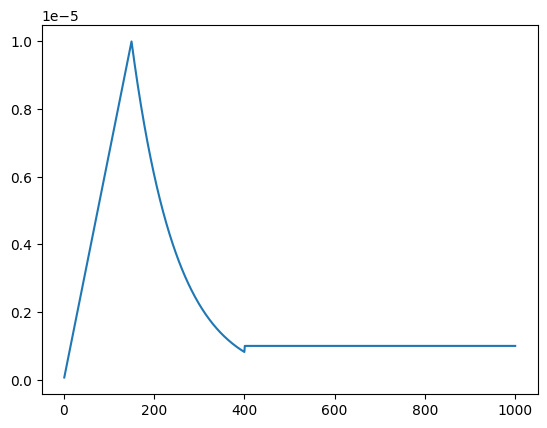

In [29]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)
pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash1 = base64.b64encode(pic_IObytes.read())
lratetoshow=pic_hash1  
print(lratetoshow)  
     

In [30]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

AMAZON COMPANY

SPLITTING OF TRAIN AND TEST DATA

In [38]:
AAPL_Date = '2022-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AMZN, AAPL_Date)

MODEL FITTING

In [39]:
AAPL_Model = Model()

In [40]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [1]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

NameError: name 'AAPL_Model' is not defined

In [42]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)
     

NameError: name 'AAPL_hist' is not defined

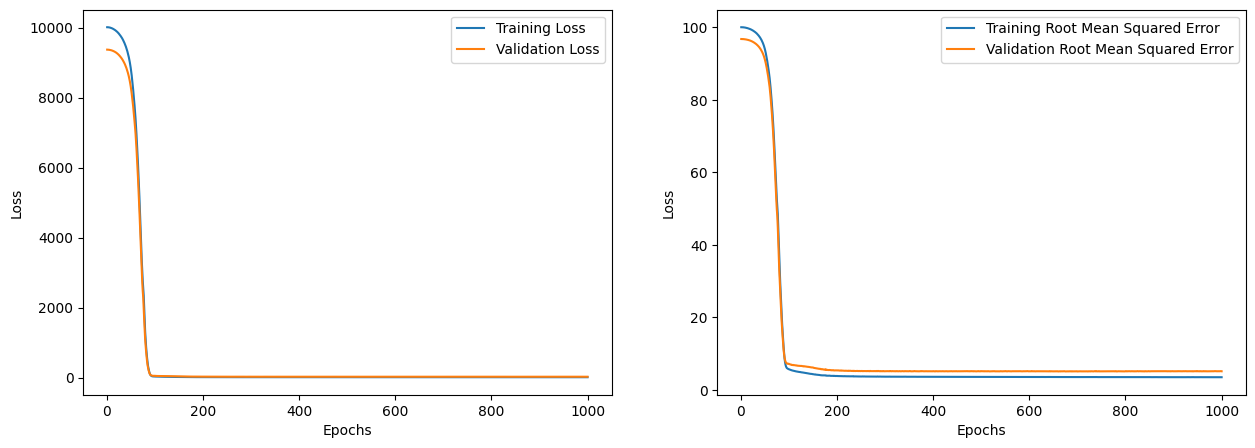

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()
pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash1 = base64.b64encode(pic_IObytes.read())
legendoftrainingandvalidation1=pic_hash1 


PREDICTING CLOSING STOCK OF APPLE

In [35]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

1/1 [==============================] - 4s 4s/step


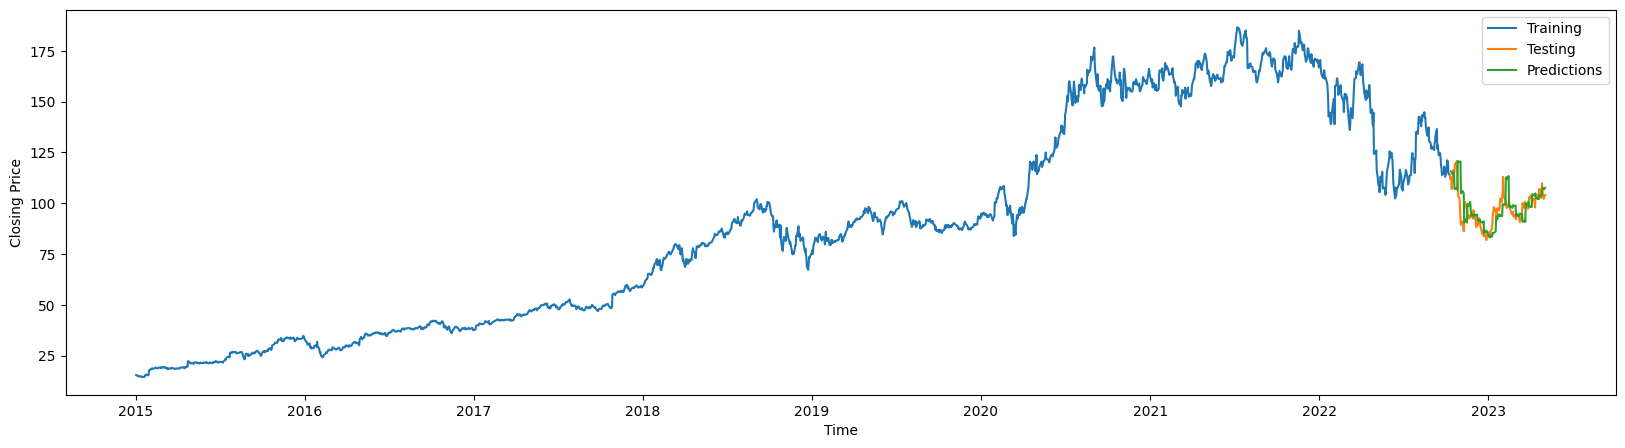

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(AMZN['Date'][AMZN['Date'] < '2022-10-12'], AMZN['Adj Close'][AMZN['Date'] < '2022-10-12'], label = 'Training')
plt.plot(AMZN['Date'][AMZN['Date'] >= '2022-10-10'], AMZN['Adj Close'][AMZN['Date'] >= '2022-10-10'], label = 'Testing')
plt.plot(AMZN['Date'][AMZN['Date'] > '2022-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash2 = base64.b64encode(pic_IObytes.read())
Predictiongraph1=pic_hash2 

In [38]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

Amazon=[]
if not Amazon:
   Amazon.append(amazon)
   Amazon.append(Amazon1)
   Amazon.append(Amazon2)
   Amazon.append(Amazon3)
   Amazon.append(legendoftrainingandvalidation1)
   Amazon.append(Predictiongraph1)
   Amazon.append(rmse)
   Amazon.append(mape)
else:
   pass

RMSE: 5.115102327100117
MAPE: 0.036056878424411576


GOOGLE

In [47]:
GOOG_Date = '2020-11-01'
GOOG_Train_X, GOOG_Train_Y, GOOG_Test_X, GOOG_Test_Y = Dataset(GOOG, GOOG_Date)

Model Fitting

In [48]:
GOOG_Model = Model()
     

GOOG_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
     

GOOG_hist = GOOG_Model.fit(GOOG_Train_X, GOOG_Train_Y, epochs = 1000, validation_data = (GOOG_Test_X, GOOG_Test_Y), callbacks = [callback])
     

Epoch 1/1000
10/10 [==============================] - 4s 79ms/step - loss: 2615.9609 - root_mean_squared_error: 51.1465 - val_loss: 13568.4736 - val_root_mean_squared_error: 116.4838 - lr: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 26ms/step - loss: 2615.9360 - root_mean_squared_error: 51.1462 - val_loss: 13568.1113 - val_root_mean_squared_error: 116.4822 - lr: 6.6667e-08
Epoch 3/1000
10/10 [==============================] - 0s 29ms/step - loss: 2615.8440 - root_mean_squared_error: 51.1453 - val_loss: 13567.3672 - val_root_mean_squared_error: 116.4790 - lr: 1.3333e-07
Epoch 4/1000
10/10 [==============================] - 0s 24ms/step - loss: 2615.6875 - root_mean_squared_error: 51.1438 - val_loss: 13566.2490 - val_root_mean_squared_error: 116.4742 - lr: 2.0000e-07
Epoch 5/1000
10/10 [==============================] - 0s 24ms/step - loss: 2615.4600 - root_mean_squared_error: 51.1416 - val_loss: 13564.7744 - val_root_mean_squared_error: 116.4679 - lr: 2.6667e-07


In [49]:
history_dict = GOOG_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

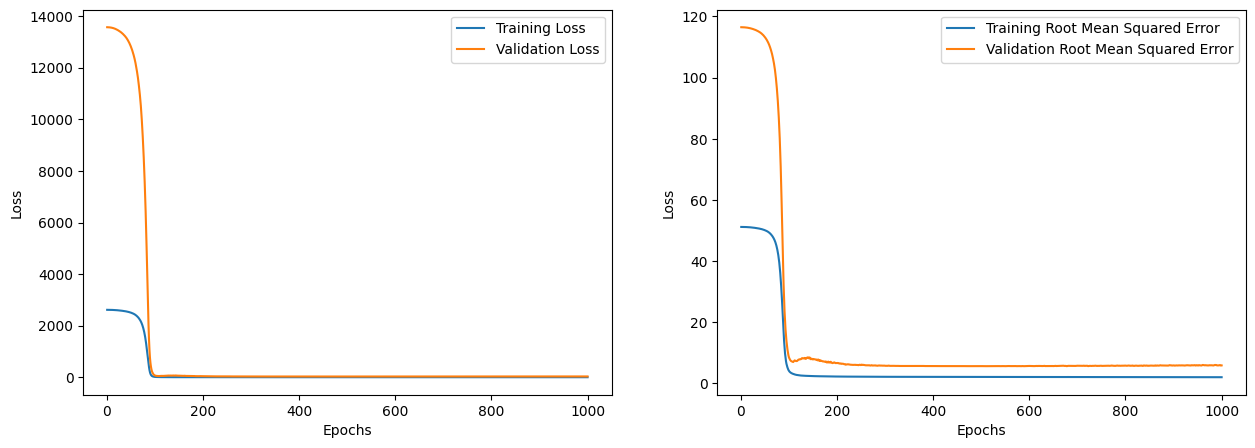

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()
pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash1 = base64.b64encode(pic_IObytes.read())
legendoftrainingandvalidation2=pic_hash1 

     

Predicting closing stock price of google

4/4 [==============================] - 0s 10ms/step


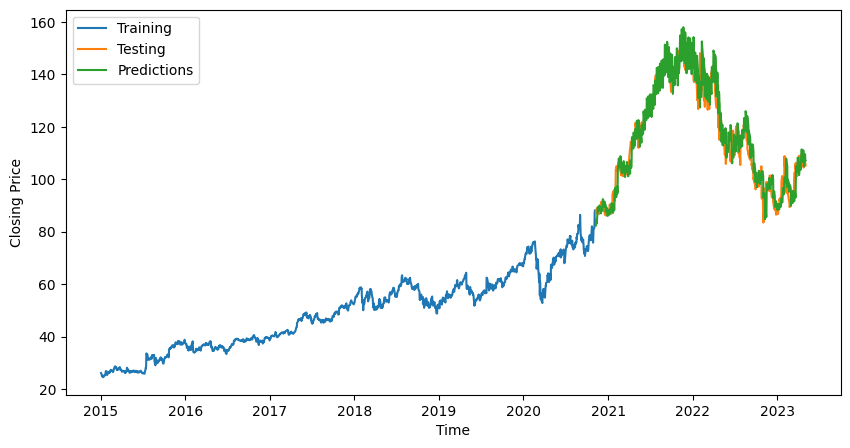

In [52]:
GOOG_prediction = GOOG_Model.predict(GOOG_Test_X)
     

plt.figure(figsize=(10, 5))
plt.plot(GOOG['Date'][GOOG['Date'] < '2020-11-07'], GOOG['Adj Close'][GOOG['Date'] < '2020-11-07'], label = 'Training')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG['Adj Close'][GOOG['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash2 = base64.b64encode(pic_IObytes.read())
Predictiongraph2=pic_hash2


In [53]:

rmse = math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Test_Y.reshape(-1, 5))/np.abs(GOOG_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

google=[]
if not google:
   google.append(Google)
   google.append(Google1)
   google.append(Google2)
   google.append(Google3)
   google.append(legendoftrainingandvalidation2)
   google.append(Predictiongraph2)
   google.append(rmse)
   google.append(mape) 
else:
   pass

RMSE: 5.84756708735942
MAPE: 0.03988974620200652


In [ ]:
args = sys.argv
if(args[1]=="google"):
    retStr = json.dumps(google)
elif(args[1]=="amazon"):
    retstr = json.dumps(Amazon)
else:
    retStr = "Invalid argument"

print(retStr)

